<a href="https://colab.research.google.com/github/Andr3sPA/SO-Lab3-20241/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

import pandas as pd
# read data and put it in a dataframe
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/18HnQ3jbgcWlTm0Cdc5Obz0aLRiTHWa-So48ANXB2In4/edit#gid=0')
sheets = gsheets.worksheet('Hoja 1').get_all_values()
df = pd.DataFrame(sheets[1:], columns=sheets[0])
for col in df.columns[1:]:
    df[col] = df[col].str.replace(',', '.').astype(float)

In [ ]:
print(df['8 hilos'])
print(type(df.loc[3, '1 hilo']))

0    16352,762
1     16814,99
2    16079,152
3    17096,811
4    17061,397
5    16355,525
6    16915,341
7    16259,443
8    16663,647
9     16740,09
Name: 8 hilos, dtype: object
<class 'str'>


Execution time     object
1 hilo            float64
2 hilos           float64
4 hilos           float64
8 hilos           float64
dtype: object


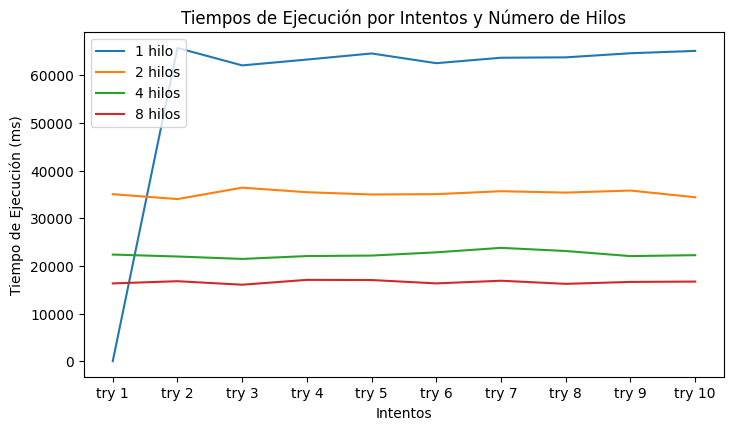

In [ ]:
import matplotlib.pyplot as plt
# Configurar el tamaño de las gráficas
plt.figure(figsize=(14, 8))

# Gráfica de líneas
plt.subplot(2, 2, 1)
for col in df.columns[1:]:
    plt.plot(df['Execution time'], df[col], label=col)
plt.xlabel('Intentos')
plt.ylabel('Tiempo de Ejecución (ms)')
plt.title('Tiempos de Ejecución por Intentos y Número de Hilos')
plt.legend()


# Mostrar las gráficas
plt.tight_layout()
plt.show()

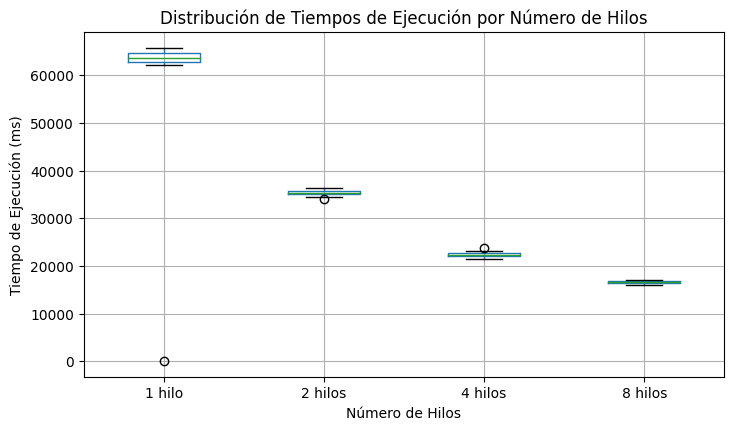

In [ ]:
# Boxplot
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 2)
df.iloc[:, 1:].boxplot()
plt.xlabel('Número de Hilos')
plt.ylabel('Tiempo de Ejecución (ms)')
plt.title('Distribución de Tiempos de Ejecución por Número de Hilos')

# Mostrar las gráficas
plt.tight_layout()
plt.show()


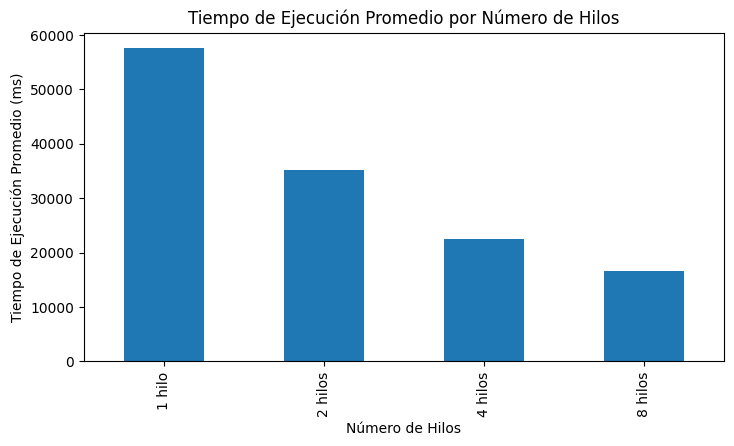

In [ ]:
# Gráfica de barras de promedios
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 3)
df.iloc[:, 1:].mean().plot(kind='bar')
plt.xlabel('Número de Hilos')
plt.ylabel('Tiempo de Ejecución Promedio (ms)')
plt.title('Tiempo de Ejecución Promedio por Número de Hilos')
# Mostrar las gráficas
plt.tight_layout()
plt.show()